# Problem statement

A manufacturing company produces two products: Radios and TV sets. Sales price relationships for these two products are given below:

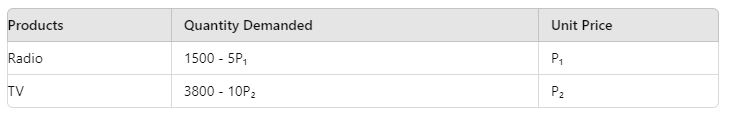

The total cost functions for these two products are given by 200x₁ + 0.1x₁² and 300x₂ + 0.1x₂², respectively. The production takes place on two assembly lines. Radio sets are assembled on Assembly line I, and TV sets are assembled on Assembly line II. Because of the limitations of the assembly line capacities, the daily production is limited to no more than 80 radio sets and 60 TV sets. The production of both types of products requires electronic components. The production of each of these sets requires five units and six units of electronic equipment components, respectively. The electronic components are supplied by another manufacturer, and the supply is limited to 600 units per day. The company has 160 employees, and the labor supply amounts to 160 man-days. The production of one unit of radio set requires 1 man-day of labor, whereas 2 man-days of labor are required for a TV set.



# Breaking down the problem statement and preparing equations and constraints

# Code Implementation

In [35]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [21]:
def profit(x):
    x1,x2 = x
    return -(100*x1-0.3*x1**2+80*x2-0.2*x2**2) # Negative sign because we are minimizing in optimization

In [30]:
def jacobian(x):
    x1, x2 = x
    dP_dx1 = 100-0.6*x1
    dP_dx2 = 80-0.4*x2
    return np.array([-dP_dx1, -dP_dx2])

In [26]:
def constraint1(x):
    return 80 - x[0]  # Radio production limit

def constraint2(x):
    return 60 - x[1]  # TV production limit

def constraint3(x):
    return 600 - (5*x[0] + 6*x[1])  # Electronic components constraint

def constraint4(x):
    return 160 - (x[0] + 2*x[1])  # Labor constraint

In [27]:
# Initial guess for x1 and x2
x0 = [50, 30]

In [28]:
# Define constraints as a dictionary
constraints = [{'type': 'ineq', 'fun': constraint1},
               {'type': 'ineq', 'fun': constraint2},
               {'type': 'ineq', 'fun': constraint3},
               {'type': 'ineq', 'fun': constraint4}]

In [38]:
# Perform the optimization
result = minimize(profit, x0, jac=jacobian, constraints=constraints, method='SLSQP', options={'disp': True})


Optimization terminated successfully    (Exit mode 0)
            Current function value: -8531.645569594808
            Iterations: 4
            Function evaluations: 4
            Gradient evaluations: 4


In [32]:
print("Optimal number of radios:", result.x[0])
print("Optimal number of TVs:", result.x[1])


Optimal number of radios: 75.94936708845962
Optimal number of TVs: 36.70886075922741


In [33]:
# Generate a contour plot for visualization
x1 = np.linspace(0, 80, 200)
x2 = np.linspace(0, 60, 200)
X1, X2 = np.meshgrid(x1, x2)
Z = np.array([profit([x1, x2]) for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
Z = Z.reshape(X1.shape)

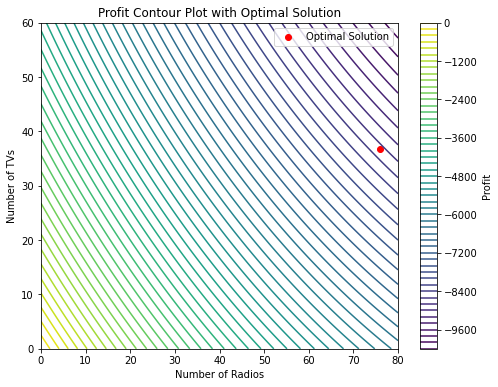

In [36]:
plt.figure(figsize=(8, 6))
plt.contour(X1, X2, Z, levels=50, cmap='viridis')
plt.colorbar(label='Profit')
plt.scatter(result.x[0], result.x[1], color='red', label='Optimal Solution')
plt.xlabel('Number of Radios')
plt.ylabel('Number of TVs')
plt.title('Profit Contour Plot with Optimal Solution')
plt.legend()
plt.show()

# The optimal solution for this problem is (x1, x2) = (75.94, 36.70)